In [265]:
#Importing Required Package
!pip install pmdarima

In [266]:
#importing Required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from pmdarima import auto_arima
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline
warnings.filterwarnings("ignore")




In [267]:
#Importing dataset into collab
df=pd.read_csv("/content/exchange_rate.csv")

In [268]:
#preview of dataset
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [269]:
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [270]:
#dataset decription
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [271]:
#data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [272]:
#dataset columns and rows
df.shape

(7588, 2)

In [273]:
print("No of rows",df.shape[0])
print("No of columns",df.shape[1])

No of rows 7588
No of columns 2


In [274]:
#null values
df.isnull().sum()

,0
date,0
Ex_rate,0


In [275]:
#duplicatd value
df.duplicated().sum()

0

# Pre Processiong

In [276]:
#Converting Date column into date datatype
df['date']=pd.to_datetime(df['date'],format="%d-%m-%Y %H:%M")

In [277]:
df1=df.copy()

In [278]:
df1 = df1.set_index('date')


In [279]:
#data Upsampling i.e Low to High Frequency
upsampled = df1.resample('d').asfreq()

In [280]:
#preview of upsampled data
upsampled.head(60)

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849
1990-01-06,0.7866
1990-01-07,0.7886
1990-01-08,0.7910
1990-01-09,0.7939


In [281]:
# Fill the values in between for remaining days
interpolated = upsampled.interpolate()
interpolated.head(50)

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849
1990-01-06,0.7866
1990-01-07,0.7886
1990-01-08,0.7910
1990-01-09,0.7939


<Axes: xlabel='date'>

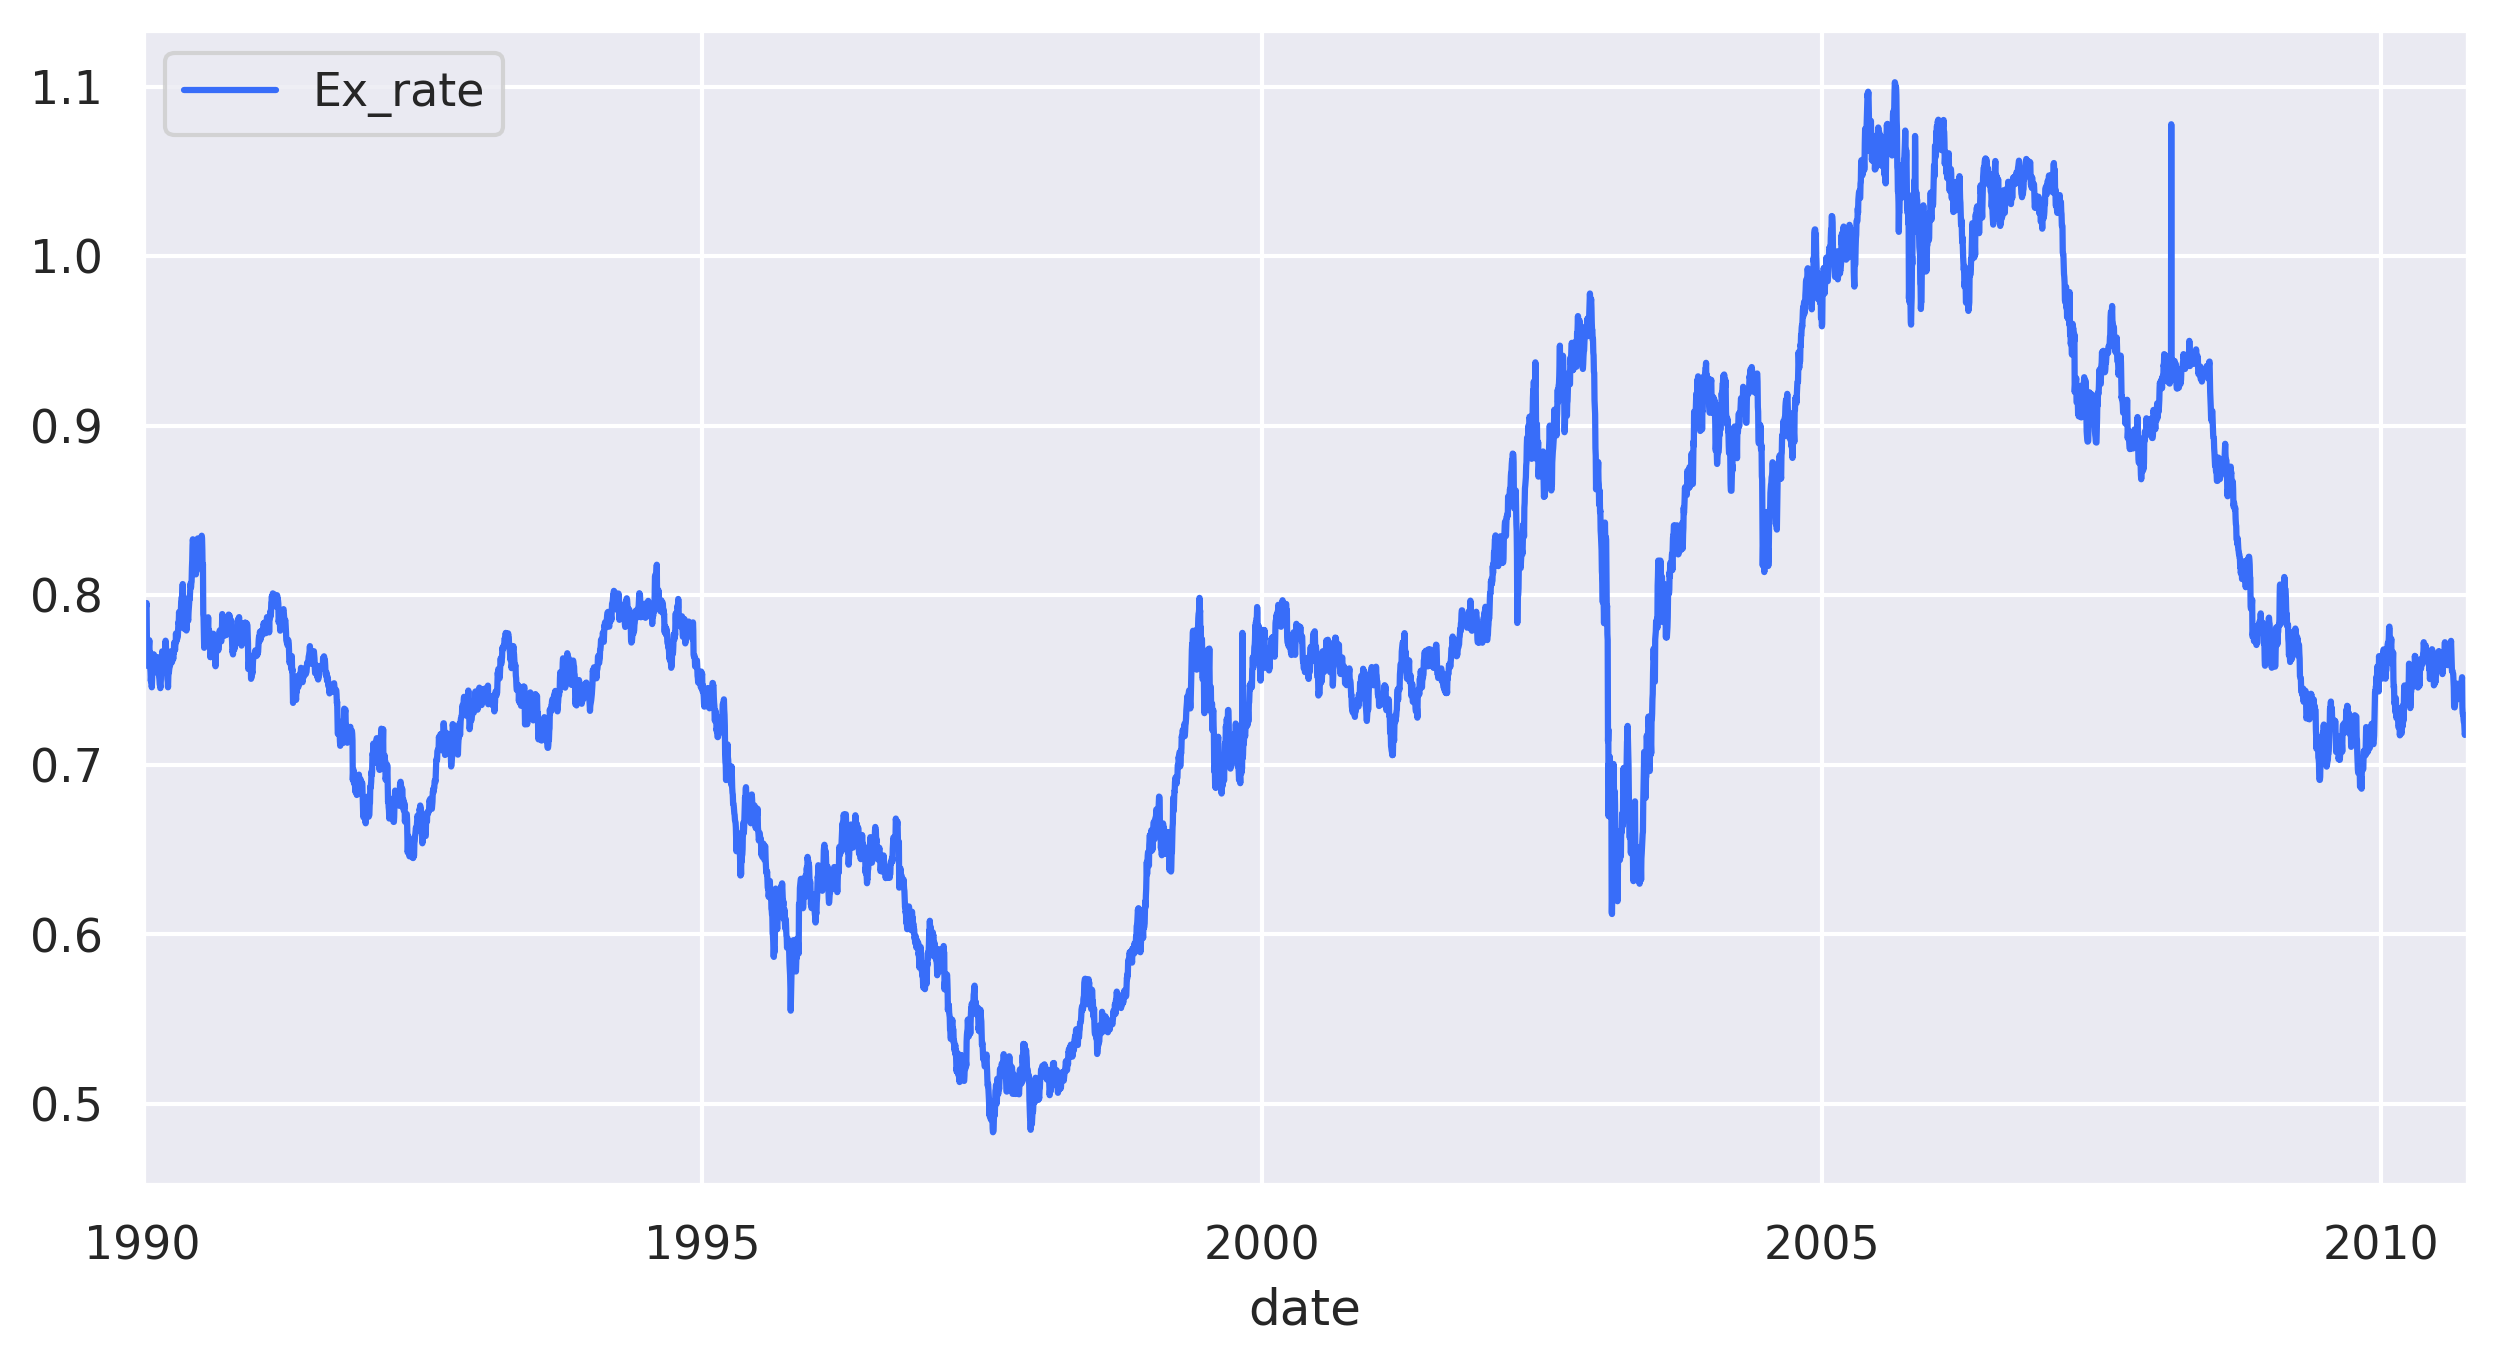

In [282]:
# Plot line plot, By default month on x axis and Ex_Rates on y axis
interpolated.plot()


* No seasonality, exponential increasing trend is available

In [283]:
#Data Downlapling i.e High to Low Frequency
downsampled = df1.resample('Q').mean()
downsampled

,Ex_rate
date,
1990-03-31,0.764122
1990-06-30,0.792053
1990-09-30,0.785475
1990-12-31,0.774154
1991-03-31,0.783332
...,...
2009-12-31,0.719797
2010-03-31,0.746596
2010-06-30,0.755990


<Axes: xlabel='date'>

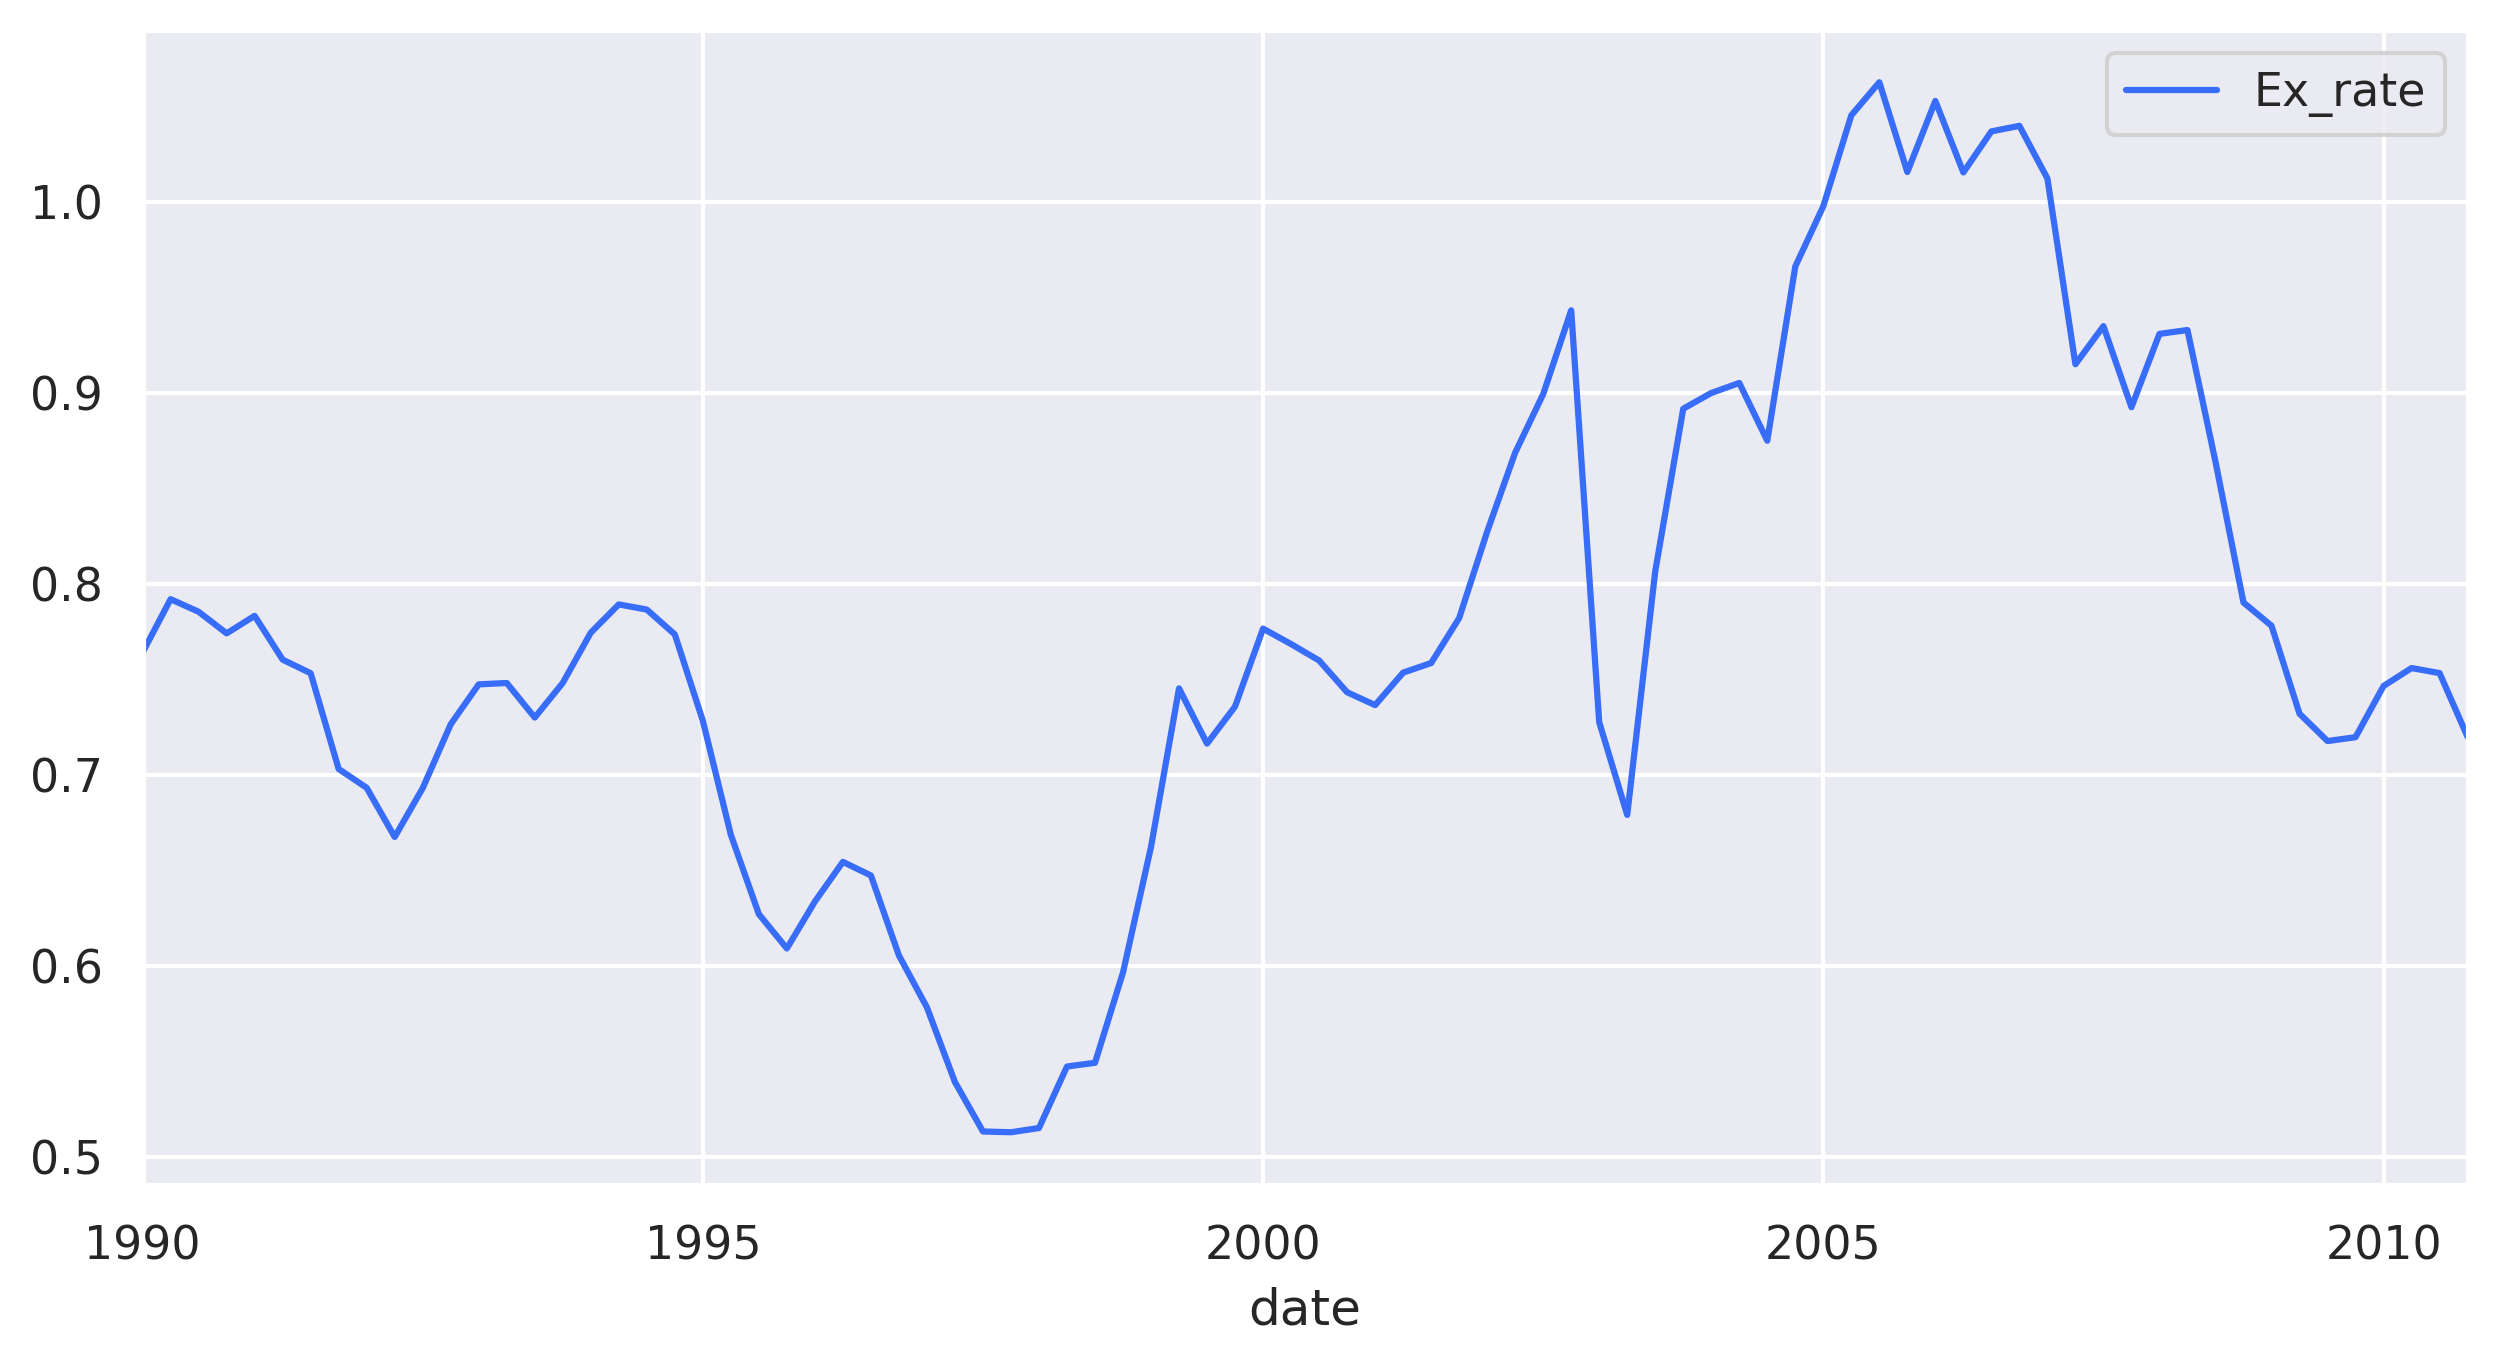

In [284]:
# Plot line plot, By default month on x axis and Ex_Rates on y axis

downsampled.plot()

* No seasonality, exponential increasing trend is available

In [285]:
# Data info after converting date column into datetime datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [286]:
#Dropping null values
df.dropna(inplace=True)

In [287]:
#Adding Month column for visualization
df['month'] = pd.to_datetime(df['date']).dt.month

In [288]:
#Data preview after addting month column
df

,date,Ex_rate,month
0,1990-01-01,0.785500,1
1,1990-01-02,0.781800,1
2,1990-01-03,0.786700,1
3,1990-01-04,0.786000,1
4,1990-01-05,0.784900,1
...,...,...,...
7583,2010-10-06,0.718494,10
7584,2010-10-07,0.721839,10
7585,2010-10-08,0.723197,10
7586,2010-10-09,0.720825,10


In [289]:
#Adding quater column for visualization

df['quater'] = pd.to_datetime(df['date']).dt.quarter

In [290]:
#Adding day column for visualization

df['day']=pd.to_datetime(df['date']).dt.day

In [291]:
#Data preview after adding quater and day column

df

,date,Ex_rate,month,quater,day
0,1990-01-01,0.785500,1,1,1
1,1990-01-02,0.781800,1,1,2
2,1990-01-03,0.786700,1,1,3
3,1990-01-04,0.786000,1,1,4
4,1990-01-05,0.784900,1,1,5
...,...,...,...,...,...
7583,2010-10-06,0.718494,10,4,6
7584,2010-10-07,0.721839,10,4,7
7585,2010-10-08,0.723197,10,4,8
7586,2010-10-09,0.720825,10,4,9


<Axes: xlabel='month', ylabel='Ex_rate'>

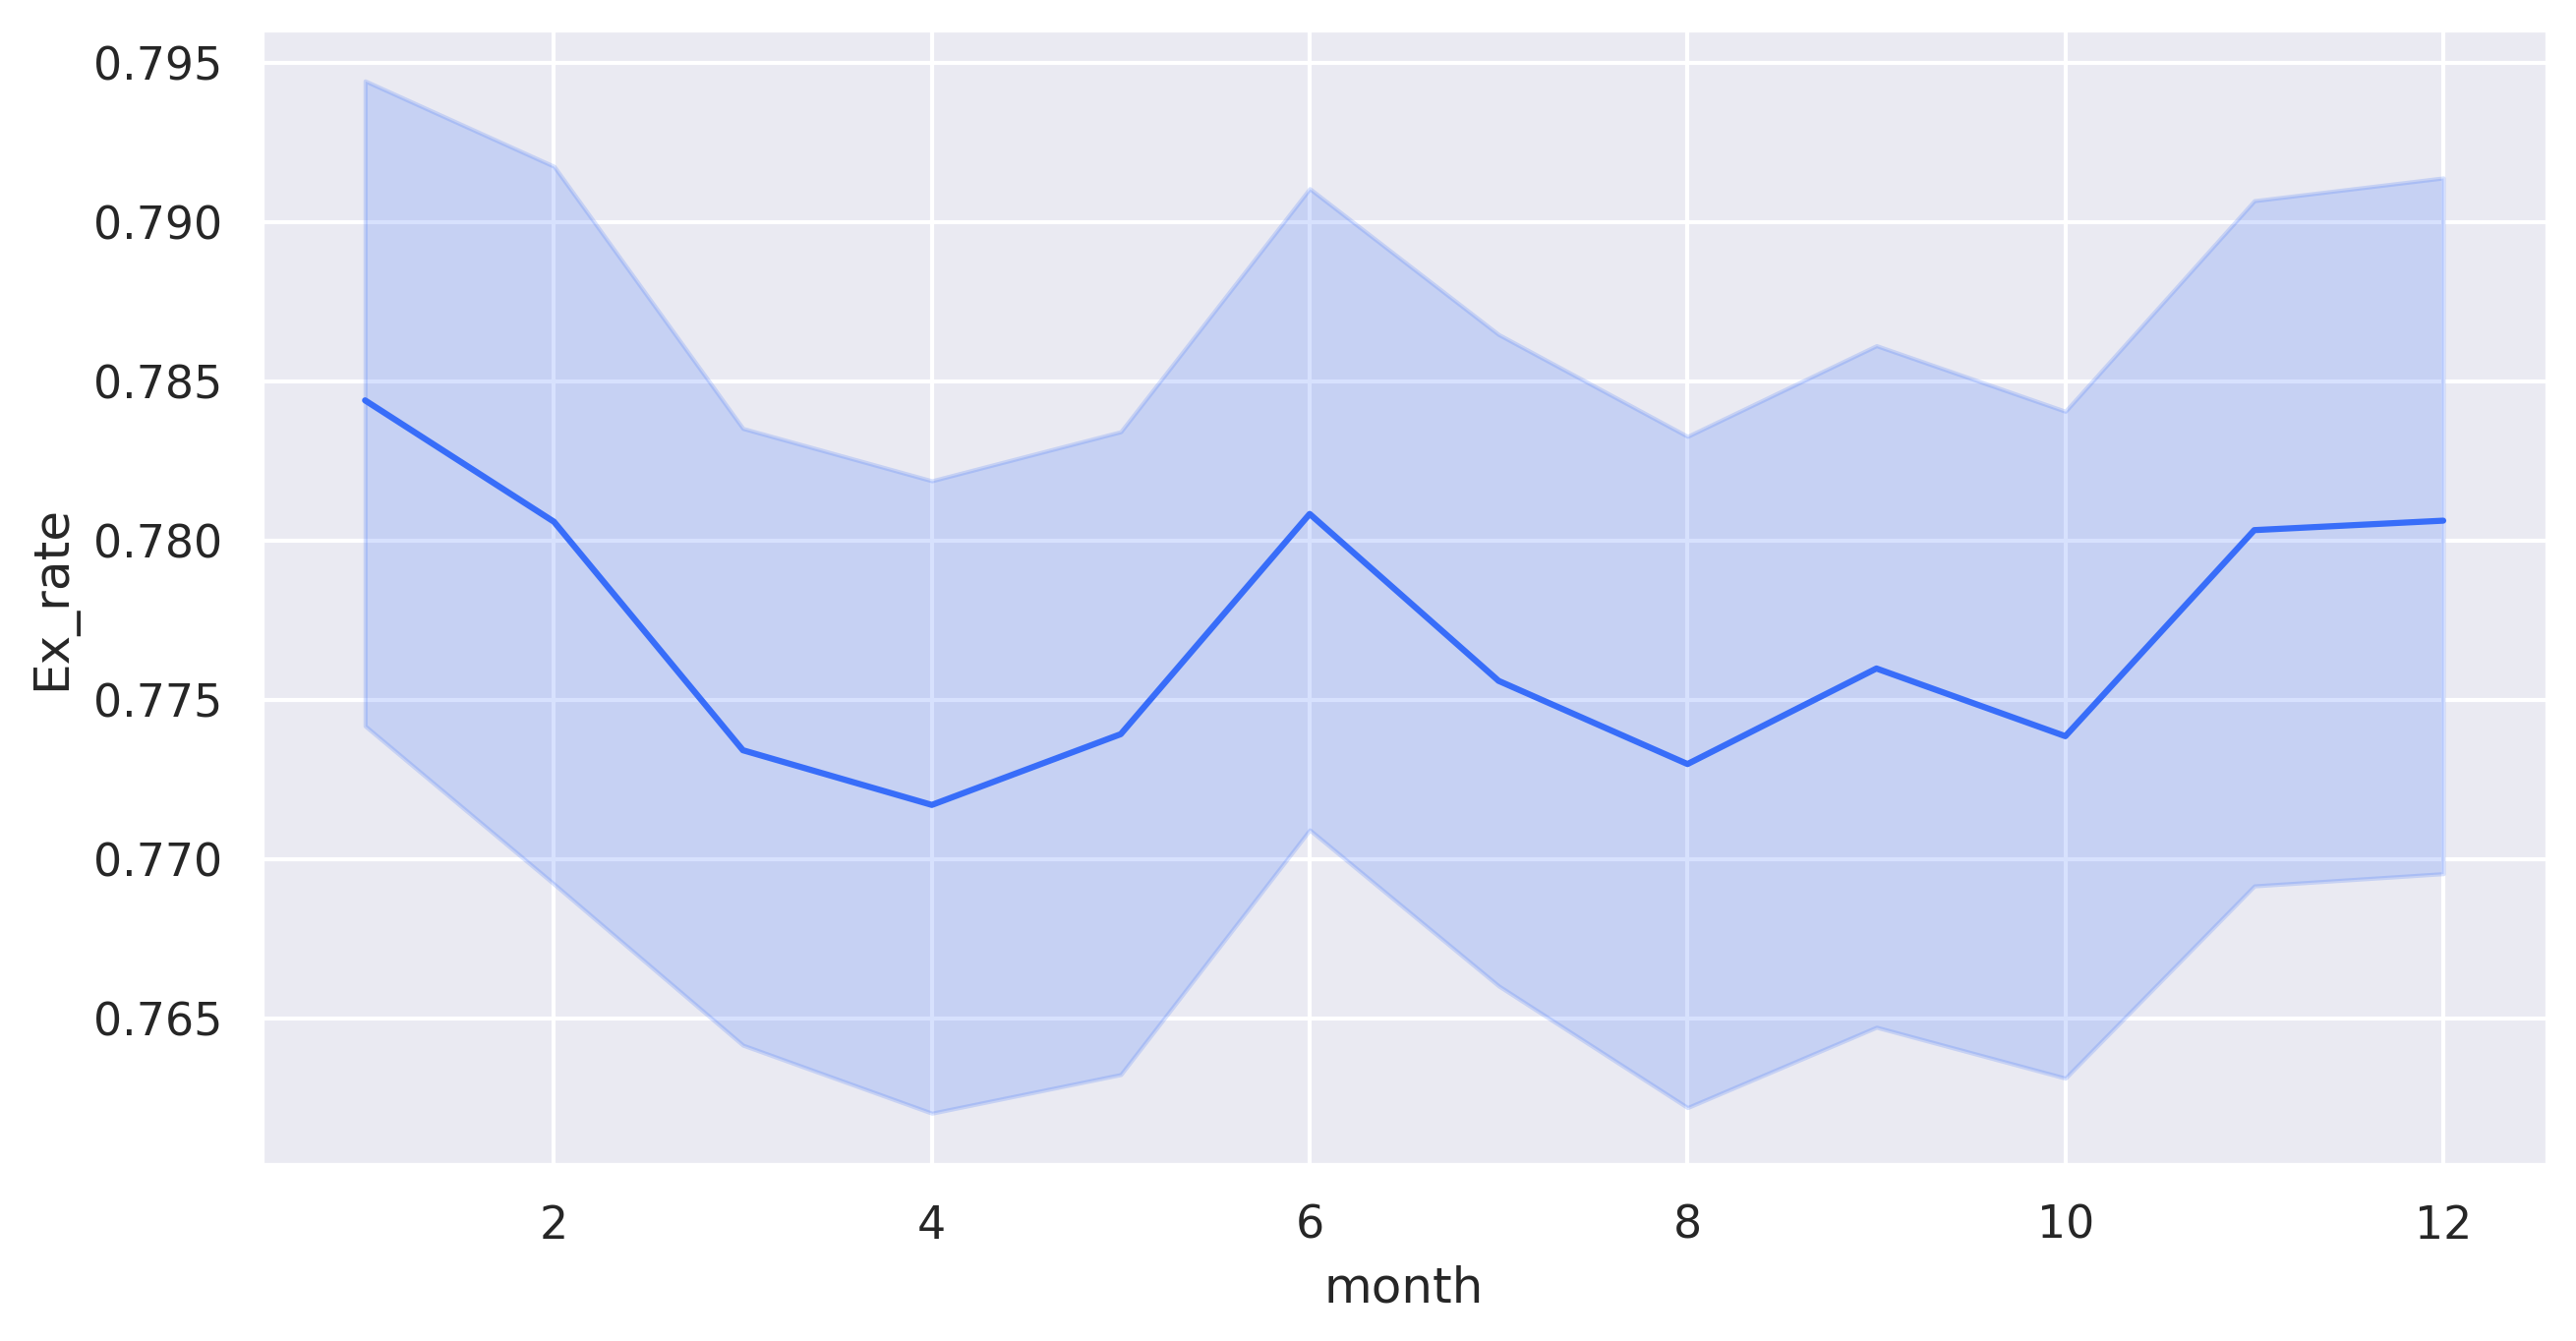

In [292]:
# Ex Rate as per month
sns.lineplot(x='month',y='Ex_rate',data=df )

<Axes: xlabel='quater', ylabel='Ex_rate'>

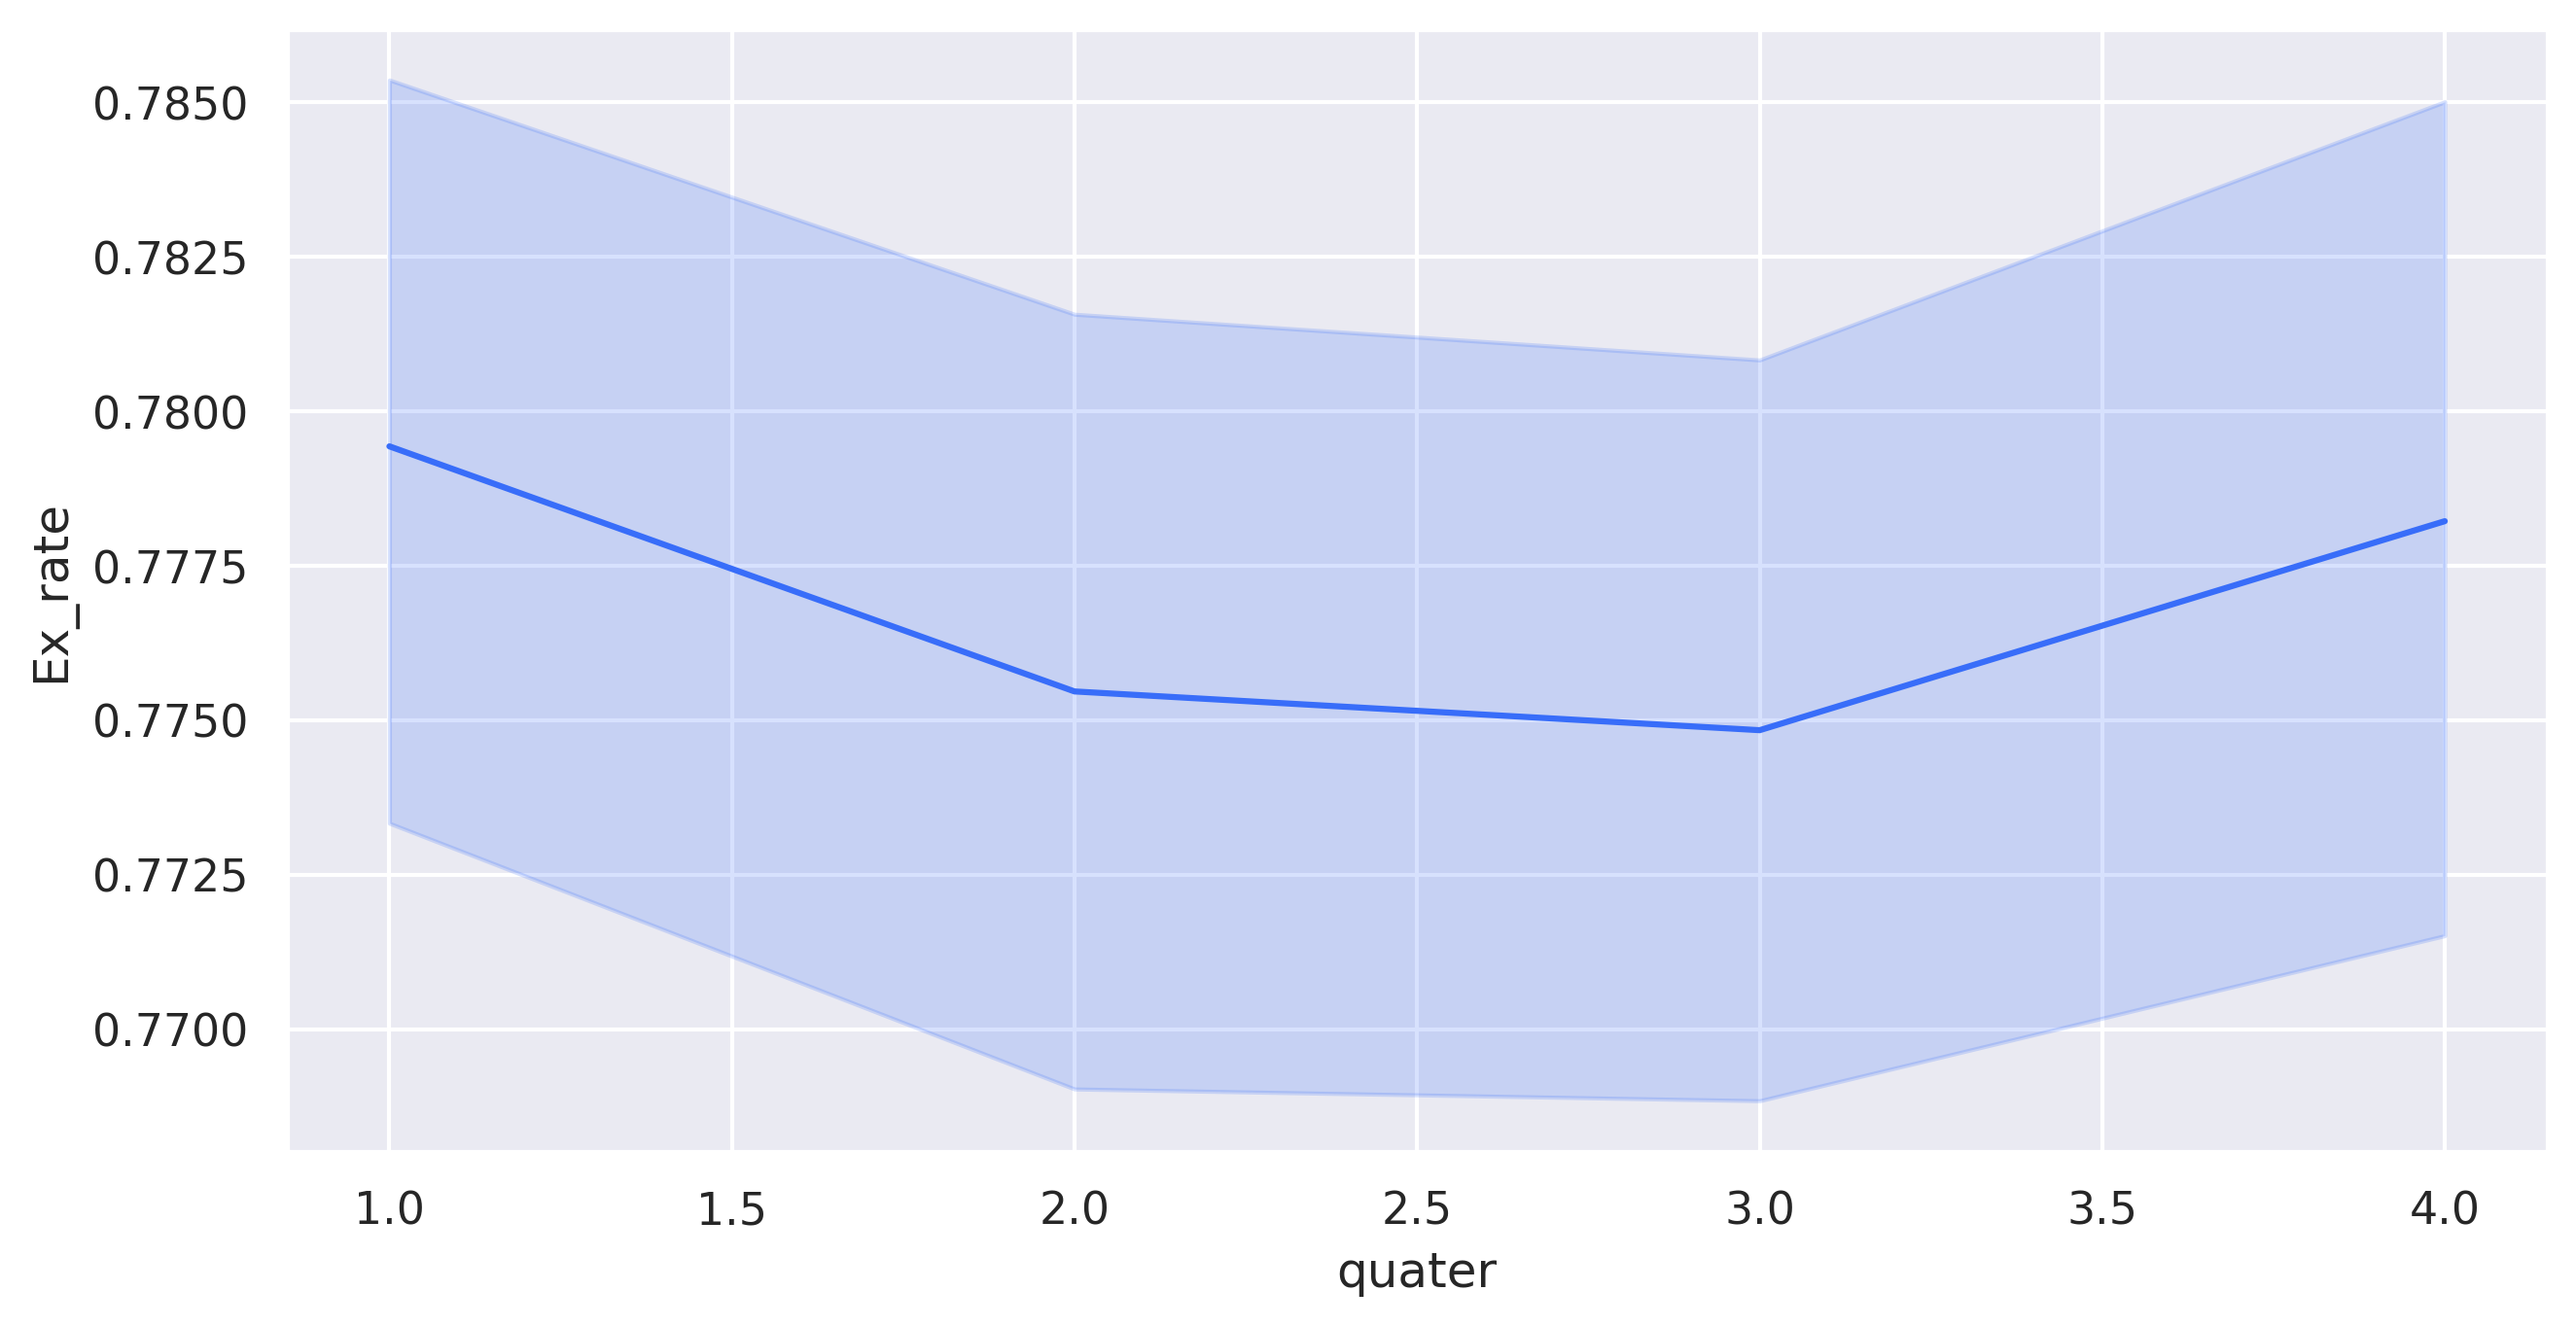

In [293]:
# Ex Rate as per quater

sns.lineplot(x='quater',y='Ex_rate',data=df)

<Axes: xlabel='day', ylabel='Ex_rate'>

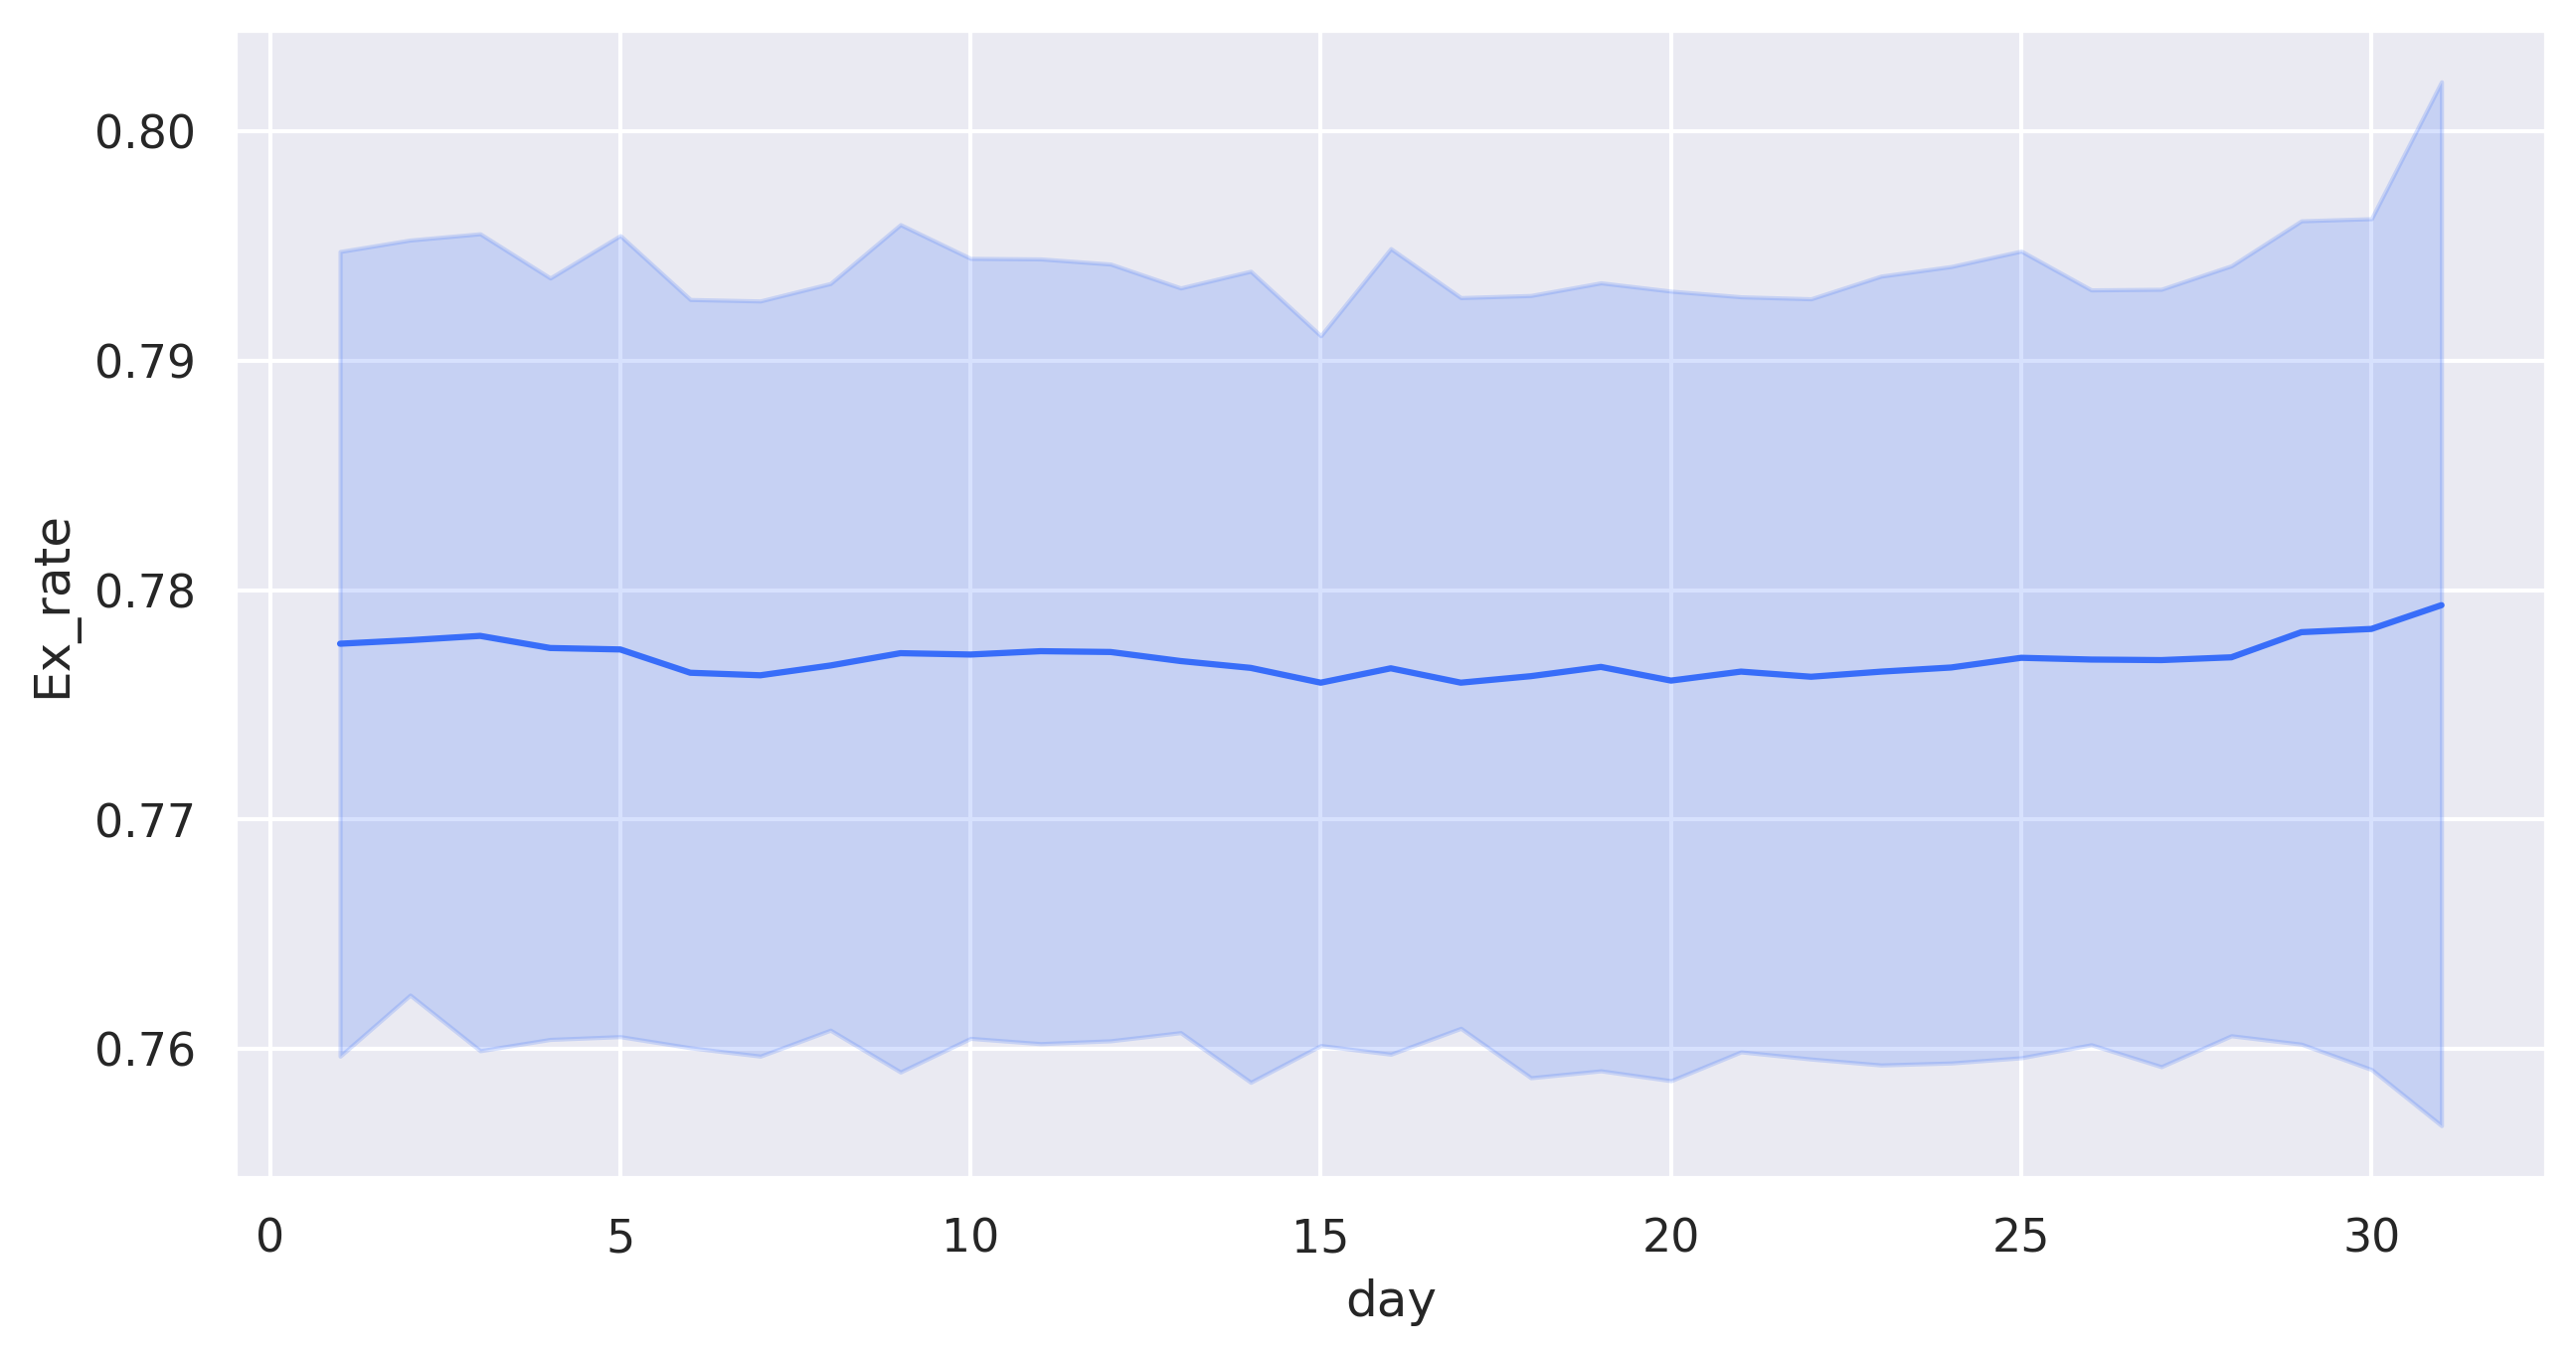

In [294]:
# Ex Rate as per day

sns.lineplot(x='day',y='Ex_rate',data=df)

<Axes: >

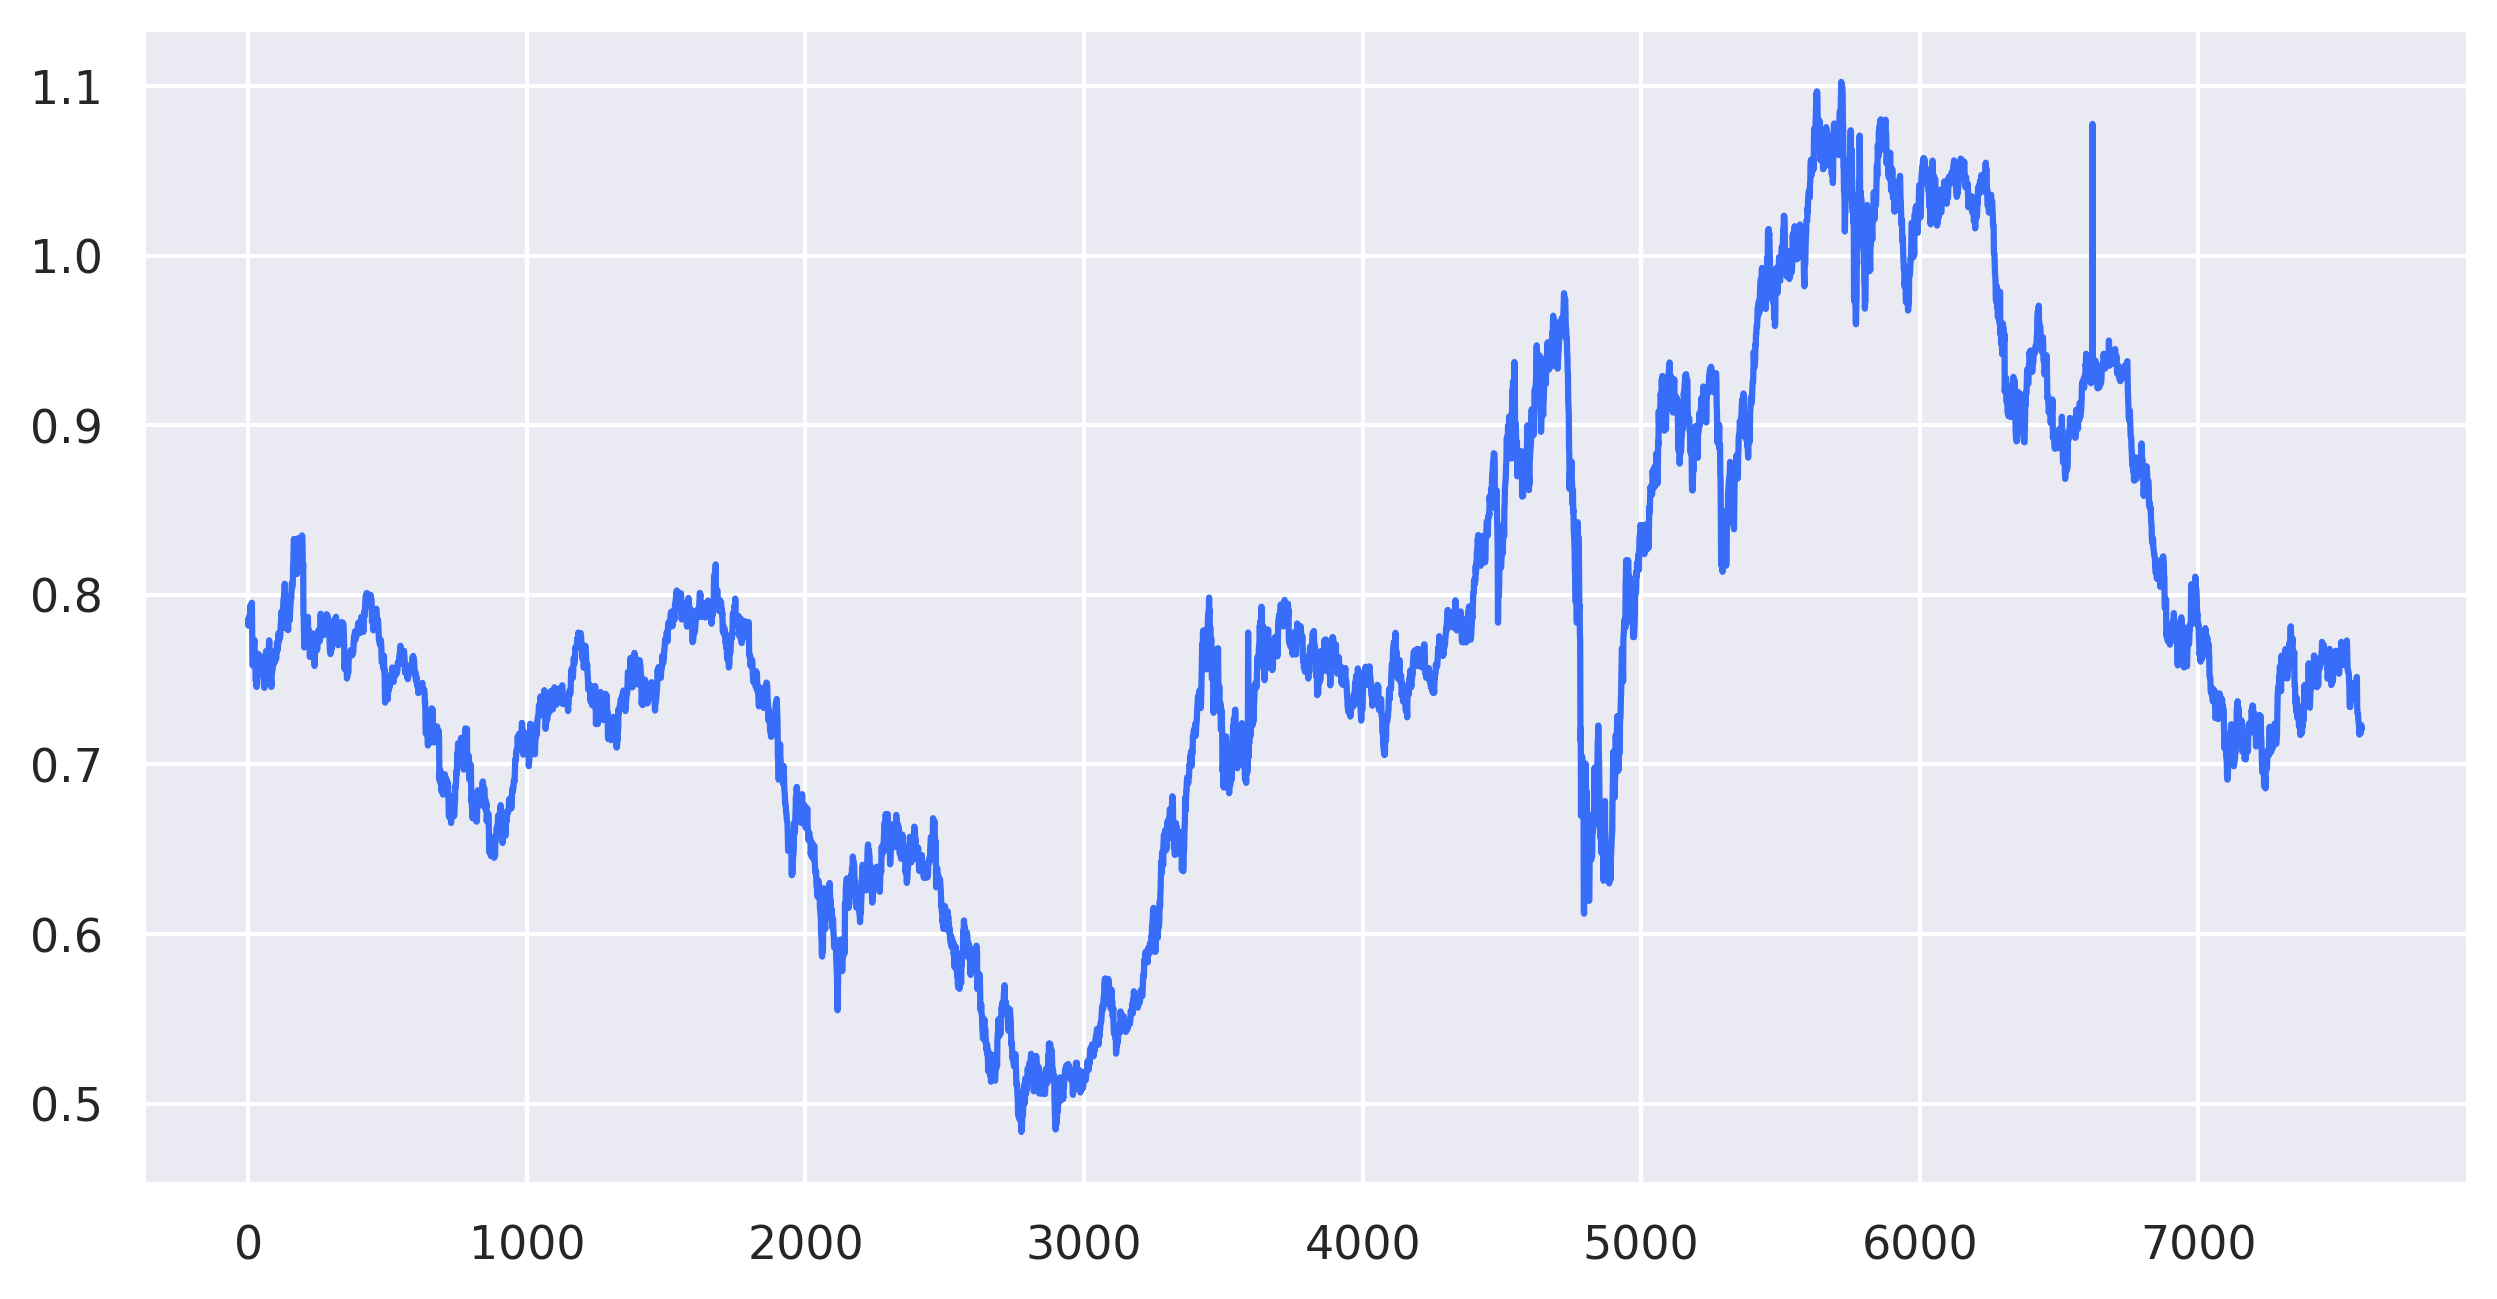

In [295]:
df.Ex_rate.plot()

In [296]:
#Checking Data Stationarity or not
adfuller(df['Ex_rate'])[1]

0.4492327353597477

Null hypothesis: Data is Non-stationary

Alternate Hypothesis: Data is Stationary

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

According to the p-value, the dataset is not stationary as the p value is greater than alpha value.

In [297]:
if adfuller(df['Ex_rate'])[1]<0.05:
  print("Data is stationary")
else:
  print("Data is not stationary")

Data is not stationary


In [298]:
#Splitting the data foir training and testing
train = df.iloc[:-130]
test = df.iloc[-130:]

In [299]:
#Training dataset preview
train.shape

(7458, 5)

In [300]:
#overview
train

,date,Ex_rate,month,quater,day
0,1990-01-01,0.785500,1,1,1
1,1990-01-02,0.781800,1,1,2
2,1990-01-03,0.786700,1,1,3
3,1990-01-04,0.786000,1,1,4
4,1990-01-05,0.784900,1,1,5
...,...,...,...,...,...
7453,2010-05-29,0.761644,5,2,29
7454,2010-05-30,0.762515,5,2,30
7455,2010-05-31,0.762602,5,2,31
7456,2010-06-01,0.762457,6,2,1


In [301]:
test.shape

(130, 5)

#Model

In [302]:
#Created a instance for Arima
model = ARIMA(train['Ex_rate'], order=(0, 0, 0)).fit()

In [303]:
#prediction
ypred = model.predict(start =7458, end = 7587)
ypred

,predicted_mean
7458,0.777417
7459,0.777417
7460,0.777417
7461,0.777417
7462,0.777417
...,...
7583,0.777417
7584,0.777417
7585,0.777417
7586,0.777417


In [304]:
#Model evaluation
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.02975705569244292


The RMSE (Root Mean Square Error) for the time series analysis came out to be 0.0298, which is pretty low. RMSE basically tells us how far off our model’s predictions are from the actual values—lower is better because it means the model is more accurate.

Since 0.0298 is a small error, it suggests that our model is doing a good job at predicting the trends in the data. Of course, it's always good to check other metrics like MAE (Mean Absolute Error) or R-squared to get a complete picture of how well the model is performing. But overall, this RMSE score indicates that the predictions are quite close to reality!

In [305]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 0)).fit()

hyperparameter range

In [306]:
# Define ARIMA hyperparameter range
p = d = q = range(0, 3)  # Testing (0,1,2) values
pdq_combinations = list(itertools.product(p, d, q))

best_aic, best_params, best_arima = np.inf, None, None



In [257]:
# Loop through parameter combinations
for param in pdq_combinations:
    try:
        model = ARIMA(df['Ex_rate'], order=param).fit()
        if model.aic < best_aic:
            best_aic, best_params, best_arima = model.aic, param, model
    except:
        continue

print(f"Best ARIMA Parameters: {best_params}, Best AIC: {best_aic}")


Best ARIMA Parameters: (2, 0, 0), Best AIC: -56105.21829878942


In [258]:
#Building a model using best parameters
model = ARIMA(train['Ex_rate'], order=(2, 0, 0)).fit()

In [259]:
ypred = model.predict(start =7458, end = 7587)
ypred

,predicted_mean
7458,0.763100
7459,0.763123
7460,0.763132
7461,0.763143
7462,0.763154
...,...
7583,0.764386
7584,0.764396
7585,0.764406
7586,0.764415


In [260]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.01910703290269431


After fine-tuning the model with the best parameters, the RMSE improved to 0.0191, which is even lower than before (0.0298). This means the model's predictions are now more accurate, with even smaller errors compared to the actual values.

A lower RMSE indicates that the model is learning the patterns in the time series data better and making more reliable forecasts. This improvement suggests that parameter tuning had a significant positive impact, making the model more effective for future predictions.

In [261]:
x=df['date']
y=df['Ex_rate']

In [262]:
# auto_arima() analyzes the data and determines the best ARIMA model parameters for your time series.

# Ensure 'Ex_rate' is numeric and has no missing values
train['Ex_rate'] = pd.to_numeric(train['Ex_rate'], errors='coerce').fillna(method='ffill')
test['Ex_rate'] = pd.to_numeric(test['Ex_rate'], errors='coerce').fillna(method='ffill')

# Fit AutoARIMA with stepwise search for stability
model = auto_arima(train['Ex_rate'],
                   start_p=0, start_q=0, max_p=5, max_q=5, max_d=2,
                   seasonal=False,
                   stepwise=True,
                   trace=True,
                   suppress_warnings=True,
                   error_action='ignore',
                   scoring='mse')





Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-54930.860, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-55061.158, Time=1.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-55059.619, Time=4.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-54932.858, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-55059.164, Time=1.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-55059.165, Time=2.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-55057.153, Time=6.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-55063.156, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-55061.161, Time=1.48 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-55061.163, Time=1.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-55061.617, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-55059.157, Time=2.75 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 24.639 seconds


In [263]:
# Make predictions
ypred = model.predict(n_periods=len(test))

In [264]:

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test['Ex_rate'], ypred))
print(f'RMSE: {rmse}')

RMSE: 0.018464382002444647


After applying Auto ARIMA, the RMSE further improved to 0.0185, which is even lower than the previous best-tuned model (0.0191) and significantly better than the initial result (0.0298).

This suggests that Auto ARIMA effectively optimized the model by automatically selecting the best parameters, leading to more accurate predictions. The decrease in RMSE indicates that the model is now capturing the patterns in the time series data even better, making it a strong choice for forecasting.



---



---



1. Initial Model (Baseline) – RMSE: 0.0298

 This was the first run of the model without much optimization.
RMSE (Root Mean Square Error) of 0.0298 indicates that the model had some level of error in predicting future values.
While not necessarily bad, there was room for improvement to enhance forecasting accuracy.

2. After Parameter Tuning – RMSE: 0.0191

 The model was fine-tuned by selecting the best parameters manually or through a grid search/random search approach.
The RMSE dropped to 0.0191, showing a clear improvement in prediction accuracy.
This means the model was now better at capturing patterns in the time series data.
The reduction in RMSE suggests that optimizing hyperparameters significantly improved performance.

3. After Using Auto ARIMA – RMSE: 0.0185

 Auto ARIMA automatically selected the best parameters for the model.
RMSE further decreased to 0.0185, which is the best performance so far.
Auto ARIMA likely chose optimal values for p (autoregressive order), d (differencing), and q (moving average order), leading to better trend and seasonality modeling.
The difference between 0.0191 (manual tuning) and 0.0185 (Auto ARIMA) is small, but even a slight reduction in RMSE means more accurate forecasts in real-world applications.